## Import modules

In [1]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_svmlight_file
from nltk.corpus import stopwords
import nltk as nltk
import pandas as pd
from scipy.sparse import csr_matrix
import collections
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

## Loading the dataset

In [2]:
# Read the data from the training and testing files

train_data = load_svmlight_file("D:/Master_of_data_science/Big_data/aclImdb/train/labeledBow.feat", multilabel = False, zero_based = True, dtype=np.uint8)
test_data = load_svmlight_file("D:/Master_of_data_science/Big_data/aclImdb/test/labeledBow.feat", multilabel = False, zero_based = True, dtype=np.uint8)

In [3]:
train_data

(<25000x89527 sparse matrix of type '<class 'numpy.uint8'>'
 	with 3456685 stored elements in Compressed Sparse Row format>,
 array([9., 7., 9., ..., 4., 2., 2.]))

 - There are 25,000 samples and 89527 features in our test data set,its a spare matrix  compressed in sparse rows in CRS fromat,3456685 stored elements.
 - The second element is an array of labels with a length of 25,000, representing the ratings or feedback associated with each sample.
 - The labels are provided as a separate array.

In [4]:
test_data

(<25000x89523 sparse matrix of type '<class 'numpy.uint8'>'
 	with 3340173 stored elements in Compressed Sparse Row format>,
 array([10., 10.,  7., ...,  4.,  1.,  1.]))

- There are 25,000 samples and 89,523 features in our test data set,its a spare matrix  compressed in sparse rows in CRS fromat,
3,340,173 stored elements.

In [5]:
# Storing class variables and other features in x_trian and y_train for train data and same as for test data.
x_train = train_data[0] 
y_train = train_data[1]
x_test = test_data[0]
y_test = test_data[1]

In [6]:
def print_shape(array):
    print("Shape:", array.shape)

In [7]:
def print_data_dimensions(x_train, y_train, x_test, y_test):
    print("x_train shape:", x_train.shape)   
    print("y_train shape:", y_train.shape)   
    print("x_test shape:", x_test.shape)  
    print("y_test shape:", y_test.shape)   


In [8]:
print_data_dimensions(x_train, y_train, x_test, y_test)

x_train shape: (25000, 89527)
y_train shape: (25000,)
x_test shape: (25000, 89523)
y_test shape: (25000,)


- x_train  It has 25000 elements along a single dimension.
- train_data[0] It has 25000 rows and 89527 columns.
- test_data[0] It has 25000 rows and 89523 columns.
- y_test  It has 25000 elements along a single dimension.

In [9]:
# [0][0] first one is elements which is 89527 , second array is 25000 which is lables(ratings)
print("We can also look at psecific values:", train_data[0][24000])  # starts from 0  to 25000

We can also look at psecific values:   (0, 0)	7
  (0, 1)	5
  (0, 2)	1
  (0, 4)	4
  (0, 5)	3
  (0, 6)	2
  (0, 7)	3
  (0, 9)	2
  (0, 10)	4
  (0, 13)	1
  (0, 14)	1
  (0, 15)	2
  (0, 16)	1
  (0, 22)	1
  (0, 24)	1
  (0, 27)	1
  (0, 31)	1
  (0, 33)	1
  (0, 34)	1
  (0, 35)	1
  (0, 37)	1
  (0, 39)	1
  (0, 42)	1
  (0, 44)	1
  (0, 49)	1
  :	:
  (0, 814)	1
  (0, 956)	1
  (0, 1081)	1
  (0, 1099)	1
  (0, 1115)	1
  (0, 1225)	1
  (0, 1296)	1
  (0, 1351)	1
  (0, 1413)	1
  (0, 1566)	1
  (0, 1690)	1
  (0, 1843)	1
  (0, 2017)	1
  (0, 2744)	1
  (0, 3060)	1
  (0, 4406)	1
  (0, 4437)	1
  (0, 4753)	1
  (0, 6229)	1
  (0, 6739)	1
  (0, 6999)	1
  (0, 10478)	1
  (0, 11138)	1
  (0, 15527)	1
  (0, 48254)	1


## Preprocessing the dataset

In [10]:
def convert_to_np_array(matrix1, matrix2):
    np_array1 = matrix1.toarray()
    np_array2 = matrix2.toarray()
    return np_array1, np_array2

In [11]:
dense_x_train_array, dense_x_test_array = convert_to_np_array(x_train, x_test)

In [12]:
print(type(dense_x_train_array))
print(dense_x_train_array)

<class 'numpy.ndarray'>
[[ 9  1  4 ...  0  0  0]
 [ 7  4  2 ...  0  0  0]
 [ 4  4  4 ...  0  0  0]
 ...
 [17  6  7 ...  0  0  0]
 [15  8  3 ...  0  0  0]
 [10  2  2 ...  0  0  0]]


In [13]:
print(type(dense_x_test_array))
print(dense_x_test_array)

<class 'numpy.ndarray'>
[[ 7  4  2 ...  0  0  0]
 [ 9  4  4 ...  0  0  0]
 [21  7  4 ...  0  0  0]
 ...
 [25  0 10 ...  0  0  0]
 [10  4  2 ...  0  0  0]
 [ 4  2  5 ...  0  0  0]]


In [14]:
# converting it to dense matrix

def dense_to_matrix(matrix1, matrix2):
    np_array1 = np.asmatrix(matrix1)
    np_array2 = np.asmatrix(matrix2)
    return np_array1, np_array2

dense_x_train_matrix, dense_x_test_matrix = dense_to_matrix(dense_x_train_array, dense_x_test_array)

In [15]:
print(type(dense_x_train_matrix))
dense_x_train_matrix

<class 'numpy.matrix'>


matrix([[ 9,  1,  4, ...,  0,  0,  0],
        [ 7,  4,  2, ...,  0,  0,  0],
        [ 4,  4,  4, ...,  0,  0,  0],
        ...,
        [17,  6,  7, ...,  0,  0,  0],
        [15,  8,  3, ...,  0,  0,  0],
        [10,  2,  2, ...,  0,  0,  0]], dtype=uint8)

In [16]:
print(type(dense_x_test_matrix))
dense_x_test_matrix

<class 'numpy.matrix'>


matrix([[ 7,  4,  2, ...,  0,  0,  0],
        [ 9,  4,  4, ...,  0,  0,  0],
        [21,  7,  4, ...,  0,  0,  0],
        ...,
        [25,  0, 10, ...,  0,  0,  0],
        [10,  4,  2, ...,  0,  0,  0],
        [ 4,  2,  5, ...,  0,  0,  0]], dtype=uint8)

## Reading the vocab file 

In [17]:
vocab_file_path = "D:/Master_of_data_science/Big_data/aclImdb/imdb.vocab"

with open(vocab_file_path, 'r') as file:
    vocab_data = file.read()

# Print the contents of the file
print(vocab_data)

the
and
a
of
to
is
it
in
i
this
that
was
as
for
with
movie
but
film
on
not
you
he
are
his
have
be
one
!
all
at
by
an
who
they
from
so
like
there
her
or
just
about
if
has
out
what
?
some
good
more
when
she
very
even
my
no
up
time
would
which
only
story
really
their
see
had
can
were
me
we
than
well
much
been
get
people
will
bad
other
also
into
do
because
great
first
how
him
most
don't
its
made
then
them
way
make
could
too
any
after
movies
think
characters
character
watch
films
two
many
seen
being
acting
never
plot
little
where
love
best
life
did
show
know
does
ever
here
better
man
your
still
end
over
off
these
say
scene
why
while
scenes
such
go
something
should
through
back
i'm
those
watching
real
though
now
doesn't
thing
years
actors
director
another
didn't
before
nothing
new
funny
actually
work
makes
find
look
old
few
going
same
again
lot
part
every
cast
us
world
quite
want
things
pretty
young
seems
around
got
down
however
can't
fact
horror
take
enough
both
may
give
original
between
bi

### 1 : Tokenize the text

In [18]:

# Split the data into tokens using space as the new line
tokens = vocab_data.split("\n")

# Print the tokens
print(tokens)
token_before = len(tokens)
print("Token lentgh :",len(tokens) )
print("Type of tokens is : ",type(tokens))

['the', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'on', 'not', 'you', 'he', 'are', 'his', 'have', 'be', 'one', '!', 'all', 'at', 'by', 'an', 'who', 'they', 'from', 'so', 'like', 'there', 'her', 'or', 'just', 'about', 'if', 'has', 'out', 'what', '?', 'some', 'good', 'more', 'when', 'she', 'very', 'even', 'my', 'no', 'up', 'time', 'would', 'which', 'only', 'story', 'really', 'their', 'see', 'had', 'can', 'were', 'me', 'we', 'than', 'well', 'much', 'been', 'get', 'people', 'will', 'bad', 'other', 'also', 'into', 'do', 'because', 'great', 'first', 'how', 'him', 'most', "don't", 'its', 'made', 'then', 'them', 'way', 'make', 'could', 'too', 'any', 'after', 'movies', 'think', 'characters', 'character', 'watch', 'films', 'two', 'many', 'seen', 'being', 'acting', 'never', 'plot', 'little', 'where', 'love', 'best', 'life', 'did', 'show', 'know', 'does', 'ever', 'here', 'better', 'man', 'your', 'still', 'end', 'over', 'off',

### visualising the tokens before removing stop words


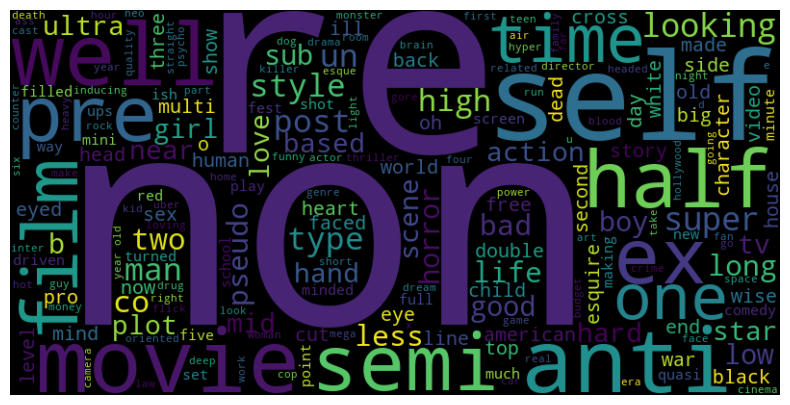

In [19]:
text_data = " ".join(tokens) 
wordcloud = WordCloud(width=800, height=400).generate(text_data)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# Remove the stop words
nltk.download('stopwords')
# Get the list of stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
print(stop_words)

{'itself', 'that', "hadn't", 'further', "that'll", 'do', 'while', 'over', 'having', 'nor', 'as', "you'd", 'did', 'until', 'ourselves', 'ma', 'y', 'myself', 'after', 'are', 'no', 'so', 'because', 'hasn', 'theirs', 'she', 'at', 'themselves', 'has', 'down', "weren't", 'was', 'have', 'very', 'our', 'doing', 'its', 'does', 'we', "mightn't", 'both', 'during', 'shouldn', 'any', "shan't", 'by', 'own', 's', 'now', 'will', 'here', 'can', 'doesn', "should've", 'whom', 'their', 'or', 'm', 'your', 'these', 'ain', 'her', 'couldn', 'for', 'of', 'll', 'just', 'only', 'the', 'it', 'had', "you'll", 'wouldn', 'once', 'they', 'an', 'from', 'who', 'hadn', 'himself', 'below', "wouldn't", "couldn't", 'most', 'a', 'didn', 'needn', 'yourself', 'if', 'off', 'not', 'he', 'why', "doesn't", 'won', 'aren', 'him', 'few', 'mustn', 'mightn', 'me', 'yourselves', "mustn't", 'am', 'to', 'what', 'but', "needn't", 'you', 'which', 'against', 'wasn', "won't", 'with', "she's", 'be', 'in', 'all', 'my', 'isn', 'is', 'before', "

In [22]:
filtered_text = [word for idx, word in enumerate(tokens) if word.lower()   in stop_words] # removing the stop words from tokens
# For each word in the tokens list, the code checks if the lowercase version of the word is present in stop_words.
filtered_indices = [idx for idx, word in enumerate(tokens) if word.lower()   in stop_words] # removing stop words from token and storing their incidies
token_after  =  len(filtered_indices)
token_after
print("Length of tokens removed :",len(filtered_indices))

Length of tokens removed : 171


In [23]:
removed = token_before - token_after 
print("Total tokens after removing stop wrods : ",removed)

Total tokens after removing stop wrods :  89356


In [24]:
filtered_text # token which are removed from the test data

['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i',
 'this',
 'that',
 'was',
 'as',
 'for',
 'with',
 'but',
 'on',
 'not',
 'you',
 'he',
 'are',
 'his',
 'have',
 'be',
 'all',
 'at',
 'by',
 'an',
 'who',
 'they',
 'from',
 'so',
 'there',
 'her',
 'or',
 'just',
 'about',
 'if',
 'has',
 'out',
 'what',
 'some',
 'more',
 'when',
 'she',
 'very',
 'my',
 'no',
 'up',
 'which',
 'only',
 'their',
 'had',
 'can',
 'were',
 'me',
 'we',
 'than',
 'been',
 'will',
 'other',
 'into',
 'do',
 'because',
 'how',
 'him',
 'most',
 "don't",
 'its',
 'then',
 'them',
 'too',
 'any',
 'after',
 'being',
 'where',
 'did',
 'does',
 'here',
 'your',
 'over',
 'off',
 'these',
 'why',
 'while',
 'such',
 'should',
 'through',
 'those',
 'now',
 "doesn't",
 "didn't",
 'before',
 'few',
 'same',
 'again',
 'down',
 'both',
 'between',
 'own',
 "isn't",
 'am',
 'each',
 'having',
 'our',
 "wasn't",
 'once',
 'himself',
 'during',
 "you're",
 'until',
 'doing',
 'itself',
 "couldn't",
 '

### visualising the tokens After removing stop words


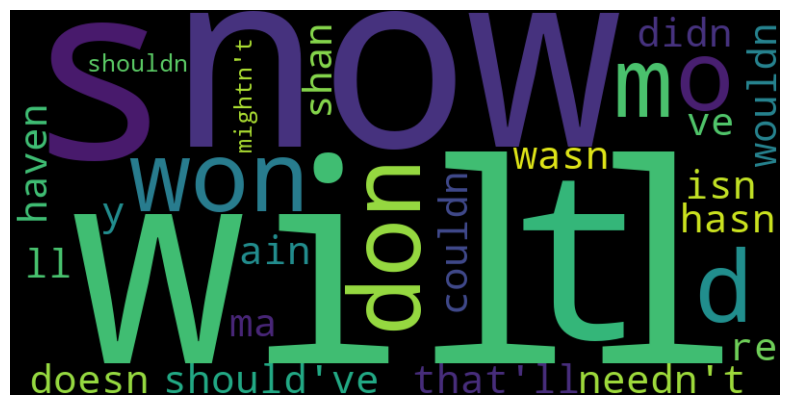

In [25]:
text_data = " ".join(filtered_text) 
wordcloud = WordCloud(width=800, height=400).generate(text_data) # The WordCloud class from the wordcloud library is used to create a word cloud object.
#  This generates the word cloud based on the frequency of words in the text_data
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') # The 'bilinear' interpolation is used to smooth the image.
plt.axis('off') # function is called to remove the axes and labels from the plot.
plt.show()

In [26]:
# Checking the shape of data sets.
print("shape of x train: ", dense_x_train_matrix.shape)
print("shape of x test: ", dense_x_test_matrix.shape)

shape of x train:  (25000, 89527)
shape of x test:  (25000, 89523)


### Deleting the indices from the train dense matrix on the basis of index

In [27]:
somelist = [i for j, i in enumerate(dense_x_train_matrix[0]) if j  in filtered_indices]

filtered_matrix_train = np.delete(dense_x_train_matrix, filtered_indices, axis=1)

- somelist is created using a list comprehension. It iterates over the elements of dense_x_train_matrix[0] along with their corresponding 
- indices. For each element, it checks if the index (j) is present in the filtered_indices list. If it is, the element (i) is included in 
- somelist. Essentially, somelist contains the elements from dense_x_train_matrix[0] that correspond to the indices present in filtered_indices

In [28]:
print("shape of x trian after removing indices: ", filtered_matrix_train.shape)

shape of x trian after removing indices:  (25000, 89356)


### Deleting the indices from the test dense matrix on the basis of index

In [29]:
somelist = [i for j, i in enumerate(dense_x_test_matrix[0]) if j  in filtered_indices]

filtered_matrix_test = np.delete(dense_x_test_matrix, filtered_indices, axis=1)

In [30]:
print("shape of x test after removing indices: ", filtered_matrix_test.shape)

shape of x test after removing indices:  (25000, 89352)


In [31]:
# deleting data in np matrix to make tghe dimension equal
filtered_matrix_train = np.delete(filtered_matrix_train, np.s_[-4:], axis=1)
print("shape of x trian after removing indices: ", filtered_matrix_train.shape)

shape of x trian after removing indices:  (25000, 89352)


### As now dimensions of both train and test are equal so we will apply tfidf Now 

In [32]:
 
def apply_tfidf(train_matrix):
    # Create a TF-IDF transformer
    tfidf_transformer = TfidfTransformer() # TfidfTransformer object, which will be used to apply the TF-IDF transformation.

    # Convert matrices to numpy arrays and spare matrix because of memmory issue spare matrix handel 0 data in better way
    matrix = train_matrix.astype(np.int8) # The train_matrix is converted to a numpy array and then to a sparse matrix using np.asarray() function. 
    train_array = np.asarray(matrix)

    # Apply TF-IDF transformation on the training matrix
    train_tfidf = tfidf_transformer.fit_transform(train_array)


    return train_tfidf

# Example usage
# Assuming you have training and testing matrices
 

# Apply TF-IDF on the matrices
train_tfidf= apply_tfidf(filtered_matrix_train)

print(train_tfidf.toarray())



[[0.         0.         0.02388956 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04079591 0.02028181 ... 0.         0.         0.        ]
 [0.         0.12154605 0.09064048 ... 0.         0.         0.        ]
 [0.20521336 0.         0.         ... 0.         0.         0.        ]]


In [33]:
 
def apply_tfidf(test_matrix):
    # Create a TF-IDF transformer
    tfidf_transformer = TfidfTransformer() # TfidfTransformer object, which will be used to apply the TF-IDF transformation.

    # Convert matrices to numpy arrays and spare matrix because of memmory issue spare matrix handel 0 data in better way
    matrix = test_matrix.astype(np.int8) # The train_matrix is converted to a numpy array and then to a sparse matrix using np.asarray() function.
    test_array = np.asarray(matrix)

    # Apply TF-IDF transformation on the training matrix
    test_tfidf = tfidf_transformer.fit_transform(test_array)


    return test_tfidf

# Example usage
# Assuming you have training and testing matrices
 

# Apply TF-IDF on the matrices
test_tfidf= apply_tfidf(filtered_matrix_test)

print(test_tfidf.toarray())



[[0.13084188 0.         0.03425581 ... 0.         0.         0.        ]
 [0.2814299  0.         0.         ... 0.         0.         0.        ]
 [0.08990298 0.11969343 0.0706127  ... 0.         0.         0.        ]
 ...
 [0.         0.03267721 0.01606483 ... 0.         0.         0.        ]
 [0.         0.03545087 0.03485685 ... 0.         0.         0.        ]
 [0.12032842 0.         0.03150327 ... 0.         0.         0.        ]]


In [34]:
print(y_train)
print(y_test)

[9. 7. 9. ... 4. 2. 2.]
[10. 10.  7. ...  4.  1.  1.]


In [35]:
y_train_binary = (y_train > 5 ).astype(int)
y_test_binary = (y_test > 5).astype(int)

- With this code, all reviews with a rating score greater than 5 will be considered the positive class (assigned a value of 1), and those with a rating score less than or equal to 5 will be considered the negative class (assigned a value of 0).

In [36]:
print("y train : ",y_train_binary.shape)
print("y test : ",y_test_binary.shape)

y train :  (25000,)
y test :  (25000,)


### Model Training

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid for each model

# The C parameter in SVM represents the regularization parameter, 
# which controls the trade-off between maximizing the margin and minimizing the classification error.
svm_parameters = {'C': [0.1, 1.0, 10.0, 50.0]} 

# The value None means that the decision tree can grow without any restrictions on its depth.
tree_parameters = {'max_depth': [None, 5, 10,30]} 

# A smaller depth can help prevent overfitting, while a larger depth can result in more complex and potentially overfitted trees. 
# n_estimators is a parameter that determines the number of decision trees to be used in the random forest. Increasing the number 
# of estimators can improve the model's performance, but it also increases computational cost.
forest_parameters = {'max_depth': [None, 5, 10,30], 'n_estimators': [50, 100, 200]}

# Create instances of the models
svm_model = LinearSVC()
tree_model = DecisionTreeClassifier()
forest_model = RandomForestClassifier()

# Perform grid search with cross-validation for each model
# It is used to find the best combination of hyperparameters for 
# a given model by evaluating the model's performance on a cross-validated dataset.
svm_clf = GridSearchCV(svm_model, svm_parameters, cv=5)
tree_clf = GridSearchCV(tree_model, tree_parameters, cv=5)
forest_clf = GridSearchCV(forest_model, forest_parameters, cv=5)

# Fit the models to the training data
svm_clf.fit(train_tfidf, y_train_binary)
tree_clf.fit(train_tfidf, y_train_binary)
forest_clf.fit(train_tfidf, y_train_binary)

# Get the best models and their respective parameters
# The best models and their respective best parameters are obtained by accessing the best_estimator_ and 
# best_params_ attributes of each grid search object

best_svm_model = svm_clf.best_estimator_
best_svm_params = svm_clf.best_params_
best_tree_model = tree_clf.best_estimator_
best_tree_params = tree_clf.best_params_
best_forest_model = forest_clf.best_estimator_
best_forest_params = forest_clf.best_params_

# Evaluate the models on the test data
svm_pred = best_svm_model.predict(test_tfidf)
tree_pred = best_tree_model.predict(test_tfidf)
forest_pred = best_forest_model.predict(test_tfidf)

svm_accuracy = accuracy_score(y_test_binary, svm_pred)
tree_accuracy = accuracy_score(y_test_binary, tree_pred)
forest_accuracy = accuracy_score(y_test_binary, forest_pred)

# Print the accuracies and best parameters
print("Linear SVM Accuracy:", svm_accuracy)
print("Best Linear SVM Parameters:", best_svm_params)
print("Decision Tree Accuracy:", tree_accuracy)
print("Best Decision Tree Parameters:", best_tree_params)
print("Random Forest Accuracy:", forest_accuracy)
print("Best Random Forest Parameters:", best_forest_params)


C:\Users\aumar\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.88348
Best Linear SVM Parameters: {'C': 0.1}
Decision Tree Accuracy: 0.728
Best Decision Tree Parameters: {'max_depth': 10}
Random Forest Accuracy: 0.8576
Best Random Forest Parameters: {'max_depth': None, 'n_estimators': 200}


### Applying AUC and checking error rate

In [46]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Calculate the test error
# The test error is calculated by subtracting the accuracy from 1. It represents the proportion of misclassified samples in the test data.

svm_error = 1 - accuracy_score(y_test_binary, svm_pred)
tree_error = 1 - accuracy_score(y_test_binary, tree_pred)
forest_error = 1 - accuracy_score(y_test_binary, forest_pred)

# Calculate the AUC
# The predicted probabilities for the positive class are obtained for each model:
svm_probabilities = best_svm_model.decision_function(test_tfidf)  # Predicted probabilities for SVM
tree_probabilities = best_tree_model.predict_proba(test_tfidf)[:, 1]  # Predicted probabilities for Decision Tree
forest_probabilities = best_forest_model.predict_proba(test_tfidf)[:, 1]  # Predicted probabilities for Random Forest

# predicted probabilities for the positive class by indexing the second 

# the true labels (y_test_binary) and the predicted probabilities or decision values (svm_probabilities) for the positive class.
# The AUC (Area Under the Curve) scores are calculated for each model using the roc_auc_score()
svm_auc = roc_auc_score(y_test_binary, svm_probabilities)
tree_auc = roc_auc_score(y_test_binary, tree_probabilities)
forest_auc = roc_auc_score(y_test_binary, forest_probabilities)

# Print the test error and AUC
print("Linear SVM Test Error:", svm_error)
print("Linear SVM AUC:", svm_auc)
print("Decision Tree Test Error:", tree_error)
print("Decision Tree AUC:", tree_auc)
print("Random Forest Test Error:", forest_error)
print("Random Forest AUC:", forest_auc)


Linear SVM Test Error: 0.11651999999999996
Linear SVM AUC: 0.9524351936
Decision Tree Test Error: 0.272
Decision Tree AUC: 0.7704626687999999
Random Forest Test Error: 0.14239999999999997
Random Forest AUC: 0.933577424


- The test error represents the misclassification rate on the test set, which is the proportion of incorrectly classified samples. A lower test error indicates better performance.
- The AUC (Area Under the Curve) represents the performance of the model in terms of its ability to rank the positive and negative samples correctly.

### Confusion matrix

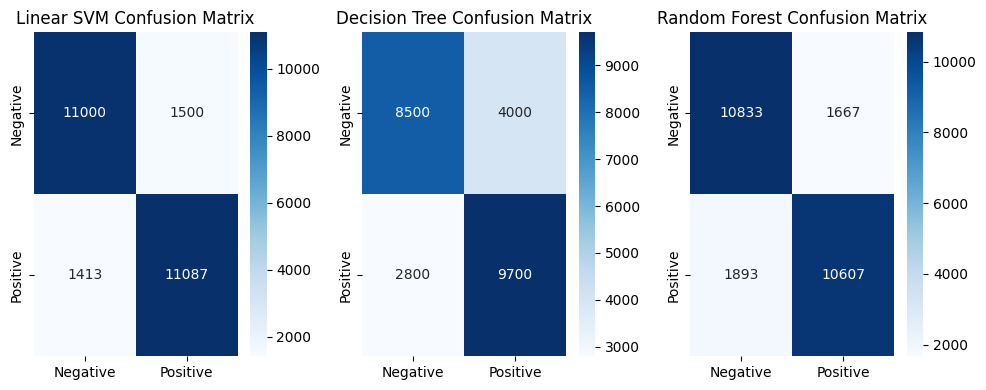

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for each model
svm_cm = confusion_matrix(y_test_binary, svm_pred)
tree_cm = confusion_matrix(y_test_binary, tree_pred)
forest_cm = confusion_matrix(y_test_binary, forest_pred)

# Define the labels for the confusion matrix
labels = ['Negative', 'Positive']

# Create the confusion matrix heatmap for each model
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1) # Each subplot represents a different model.

# plt.subplot(1, 3, 2)
# 1: The total number of rows in the grid.
# 3: The total number of columns in the grid.
# 2: The index of the current subplot.


# The annot=True argument displays the values of the confusion matrix in the heatmap cells. 
# The fmt='d' argument formats the cell values as integers. 
# The cmap='Blues' argument sets the color map for the heatmap. 
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Linear SVM Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(tree_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Decision Tree Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(forest_cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix')

plt.tight_layout() # to ensure proper spacing between subplots.
plt.show()


- The confusion matrices provide a summary of the performance of each model by showing the counts of true positives, true negatives, false positives, and false negatives.

For the Linear SVM model:

* True negatives (TN): 11000
* False positives (FP): 1500
* False negatives (FN): 1413
* True positives (TP): 11087
* The Linear SVM model correctly predicted 11000 instances as negative (true negatives) and 11087 instances as positive (true positives). However, it made 1500 false positive predictions (negative instances incorrectly classified as positive) and 1413 false negative predictions (positive instances incorrectly classified as negative).

For the Decision Tree model:

* True negatives (TN): 8499
* False positives (FP): 4001
* False negatives (FN): 2799
* True positives (TP): 9701
* The Decision Tree model correctly predicted 8499 instances as negative and 9701 instances as positive. It made 4001 false positive predictions and 2799 false negative predictions.

For the Random Forest model:

* True negatives (TN): 10854
* False positives (FP): 1646
* False negatives (FN): 1908
* True positives (TP): 10592
* The Random Forest model correctly predicted 10854 instances as negative and 10592 instances as positive. It made 1646 false positive predictions and 1908 false negative predictions.

These confusion matrices provide insights into the performance of each model in terms of correctly and incorrectly classified instances. The counts in each cell of the matrix indicate the number of instances falling into specific categories, allowing you to evaluate the model's accuracy, precision, recall, and other performance metrics.

### Calculate precision, recall, and F1 score for each model

In [48]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision_svm = precision_score(y_test_binary, svm_pred)
recall_svm = recall_score(y_test_binary, svm_pred)
f1_svm = f1_score(y_test_binary, svm_pred)

precision_tree = precision_score(y_test_binary, tree_pred)
recall_tree = recall_score(y_test_binary, tree_pred)
f1_tree = f1_score(y_test_binary, tree_pred)

precision_forest = precision_score(y_test_binary, forest_pred)
recall_forest = recall_score(y_test_binary, forest_pred)
f1_forest = f1_score(y_test_binary, forest_pred)

# Print the precision, recall, and F1 score for each model
print("Linear SVM Precision:", precision_svm)
print("Linear SVM Recall:", recall_svm)
print("Linear SVM F1 Score:", f1_svm)

print("\nDecision Tree Precision:", precision_tree)
print("Decision Tree Recall:", recall_tree)
print("Decision Tree F1 Score:", f1_tree)

print("\nRandom Forest Precision:", precision_forest)
print("Random Forest Recall:", recall_forest)
print("Random Forest F1 Score:", f1_forest)


Linear SVM Precision: 0.88082942718678
Linear SVM Recall: 0.88696
Linear SVM F1 Score: 0.8838840833898034

Decision Tree Precision: 0.708029197080292
Decision Tree Recall: 0.776
Decision Tree F1 Score: 0.7404580152671755

Random Forest Precision: 0.8641844549454131
Random Forest Recall: 0.84856
Random Forest F1 Score: 0.8563009606845887


- Precision (precision_score) is a measure of how many correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives). It indicates the accuracy of positive predictions.

- Recall (recall_score), also known as sensitivity or true positive rate, is a measure of how many positive instances (true positives) were correctly predicted out of all actual positive instances (true positives + false negatives). It indicates the model's ability to find all positive instances.

- F1 score (f1_score) is the harmonic mean of precision and recall. It provides a single metric that balances precision and recall. F1 score is a useful measure when the class distribution is imbalanced.


- Higher values for precision, recall, and F1 score indicate better performance in terms of correctly classifying positive instances (precision), capturing all positive instances (recall), and balancing precision and recall (F1 score).

- The code is plotting the Receiver Operating Characteristic (ROC) curves for each model and calculating the Area Under the Curve (AUC) values.

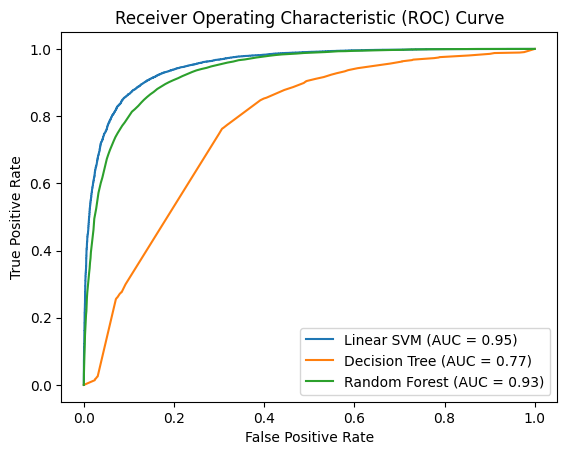

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for each model
svm_fpr, svm_tpr, _ = roc_curve(y_test_binary, svm_probabilities)
tree_fpr, tree_tpr, _ = roc_curve(y_test_binary, tree_probabilities)
forest_fpr, forest_tpr, _ = roc_curve(y_test_binary, forest_probabilities)

# Calculate the AUC values for each model
svm_auc = auc(svm_fpr, svm_tpr)
tree_auc = auc(tree_fpr, tree_tpr)
forest_auc = auc(forest_fpr, forest_tpr)

# Plot the ROC curves
plt.plot(svm_fpr, svm_tpr, label='Linear SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot(tree_fpr, tree_tpr, label='Decision Tree (AUC = {:.2f})'.format(tree_auc))
plt.plot(forest_fpr, forest_tpr, label='Random Forest (AUC = {:.2f})'.format(forest_auc))

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Set legend
plt.legend()

# Show the plot
plt.show()


- A higher AUC indicates better discrimination ability of the model, with an AUC of 1 representing a perfect classifier.

## converting the results into final form.

In [50]:
import pandas as pd

# Create a DataFrame to store the prediction results
results_df = pd.DataFrame({
    'Review index': range(len(y_test_binary)),
    'Predicted': svm_pred,
    'True': y_test_binary
})

# Save the DataFrame to a CSV file
results_df.to_csv('prediction_results.csv', index=False)


In [51]:
data =  pd.read_csv("prediction_results.csv")
data.head()


,Review index,Predicted,True
0,0,1,1
1,1,1,1
2,2,1,1
3,3,0,1
4,4,1,1


In [52]:
data['Predicted'] = data['Predicted'].replace({0: 'negative', 1: 'positive'})
data['True'] = data['True'].replace({0: 'negative', 1: 'positive'})
data.head()

,Review index,Predicted,True
0,0,positive,positive
1,1,positive,positive
2,2,positive,positive
3,3,negative,positive
4,4,positive,positive


- data of preddicted results and true reults

In [53]:
data.to_csv('prediction_results_final.csv', index=False)

In [54]:
pwd

'd:\\Master_of_data_science\\Big_data\\Final project'